## Imports (please write all imports here)

In [37]:
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import scipy
import scipy.optimize
import scipy.integrate
from scipy.integrate import odeint
from scipy.optimize import fsolve

## Function definitions

You are given all the equations. It is recommended that you use the notation provided to avoid errors - feel free to copy paste.




Note:

CN_1 =  $[CN^-]_{tank  1} \ \ $  
AU_CN_1 = $[AU(CN_2)^-]_{tank1} $  
AU_CN_carb_1 = $[Au(CN_2)^-_{carbon,tank1}] $

etc.

## Parameters (you may call this function and unpack it to get all the parameters)

In [38]:
def parameters():
    AuCN2_star = 2.6e-5 # kmol/m3
    CN_D = 9.5 #kmol/m3
    V1,V2 = [2.5]*2  # m3
    rho_c1,rho_c2 = [16]*2 # kg/m3
    K_H = 1300 #kmol/m3atm
    K_l = 1.215 #m3/kmols
    K_a = 45  # m3/kmols
    alpha = 4500 # unitless
    beta = 0.9  # unitless
    AU_CN_carb_3 = 0 
    CN_0 = 0
    AU_CN_0 = 0
    return AuCN2_star,CN_D,V1,V2,rho_c1,rho_c2,K_l, K_a,alpha,beta,AU_CN_carb_3,CN_0,AU_CN_0,K_H


## Question 1: Steady state

Calculate the initial values of all
the variables in the system given the steady state input values and parameters. You should write a single function that when called produces a list of all the outputs in the following order :  


CN_1, CN_2, AU_CN_1, AU_CN_2, AU_CN_carb_1, AU_CN_carb_2, F_s1, F_s2, O2_1 , O2_2, rl_1, rl_2, ra_1, ra_2

Note that the variables are comma separated with the same notation as the given equations so that you can copy paste.


In [39]:
AuCN2_star, CN_D, V1, V2, rho_c1, rho_c2, K_l, K_a, alpha, beta, AU_CN_carb_3, CN_0, AU_CN_0, K_H = parameters()
#given steady state values
F_D1 = 2.86e-4 #m3/s dosing line flow in
F_D2 = 2.86e-4 #m3/s dosing line flow in
F_s0 = 0.328 #m3/s feed slurry flow in
m_c = 1.33 #kg/s
p_O21 = 0.21 #atm
p_O22 = 0.21 #atm

def SteadySys():
    #equations not containing required outputs:
    F_s1 = F_s0 + F_D1
    F_s2 = F_s1 + F_D2
    O2_1 = K_H*p_O21
    O2_2 = K_H*p_O22
    
    def SteadyEqs(x):
        CN_1, CN_2, AU_CN_1, AU_CN_2, AU_CN_carb_1, AU_CN_carb_2, rl_1, rl_2, ra_1, ra_2 = x
        #differential equations at SS
        
        eq01 = (F_D1 / V1) * CN_D + (F_s0/V1) * CN_0 - (F_s1/V1) * CN_1 - 2* rl_1 
        eq02 = (F_D2 / V2) * CN_D + (F_s1/V2) * CN_1 - (F_s2/V2) * CN_2 - 2* rl_2 
        eq03 = (F_s0 / V1) * AU_CN_0 - (F_s1 / V1) * AU_CN_1 + rl_1 - ra_1 * rho_c1 
        eq04 = (F_s1 / V2) * AU_CN_1 - (F_s2 / V2) * AU_CN_2 + rl_2 - ra_2 * rho_c2 
        eq05 = (m_c/(rho_c1 * V1)) * ( AU_CN_carb_2 - AU_CN_carb_1) + ra_1 
        eq06 = (m_c/(rho_c2 * V2)) * ( AU_CN_carb_3 - AU_CN_carb_2) + ra_2  
    
        #Algebraic equations
        
        eq07 = rl_1 - K_l * (CN_1)**0.5 * O2_1**0.5 * (AuCN2_star - AU_CN_1)  
        eq08 = rl_2 - K_l * (CN_2)**0.5 * O2_2**0.5 * (AuCN2_star - AU_CN_2)  
        eq09 = ra_1 - K_a * AU_CN_1 * (alpha * AU_CN_1 ** beta - AU_CN_carb_1)   
        eq10 = ra_2 - K_a * AU_CN_2 * (alpha * AU_CN_2 ** beta - AU_CN_carb_2)  
        
        return eq01, eq02, eq03, eq04, eq05, eq06, eq07, eq08, eq09, eq10
    #using fsolve on SS equations containing required outputs
    #guess = [0.007,0.015,0,0,0.00019,0.00011,0,0,0,0] #guessed staring values at zero, then entered outputs as an itertion to approximate
    #guess = [0.00763,0.015,1.869e-6, 2.218e-6,0.0001889,0.0001098,4.2319e-5, 5.848e-05,2.62965e-6,3.6521e-6]
    x0 = [0.007631,0.015,1.869e-6,2.21826e-6,0.0001889,0.000109838,4.23198e-05,5.848e-5, 2.69650e-6,3.652e-6]
    SSvals = fsolve(SteadyEqs,[x0])
    return(SSvals[0],SSvals[1],SSvals[2],SSvals[3],SSvals[4],SSvals[5],SSvals[6],SSvals[7],SSvals[8],SSvals[9]) 
    
VALS = SteadySys()
print(VALS)

(0.0076317624990166486, 0.01500431997661502, 1.8690718989315157e-06, 2.218260126138057e-06, 0.0001889258873350819, 0.00010983865576628677, 4.2319843249564053e-05, 5.8480272079165691e-05, 2.6296504496624379e-06, 3.6521353042290355e-06)


## Question 2: Dynamic Simulation

Simulate the system using only the equations given and odeint for numeric integration. (use the 1st block for integration and the 2nd block for plotting). Your program should calculate an initial condition using the same code as Question:1

show the effect of the following inputs (all in one simulation run):

- 1) a 10% step increase in F_D1 at t = 100s  
- 2) a 10% step increase in F_s0 at t = 250s
- 3) a 10% step decrease in p_O22 at t = 600s

Plot the combined dynamic effect of these changes on each of the 6 state variables (6 plots). Please use matplotlib inline to   
make marking more fluid. Make sure that your graphs are labelled. Simulate for 1000s and do not change any units or scale any 
of your graphs. You can expect the numbers to be very small.

In [40]:
#Jupyter Equation tools as reference

tspan = numpy.linspace(0, 1000, 10000)

x0state = [VALS[0], VALS[1], VALS[2], VALS[3], VALS[4], VALS[5]]

def int_func(x,t):
    F_D1_temp = 2.86e-4 # m3/s
    F_s0_temp = 0.328 # m3/s
    p_O22_temp = 0.21
    
    AuCN2_star = 2.6e-5 # kmol/m3
    CN_D = 9.5 #kmol/m3
    V1,V2 = [2.5]*2  # m3
    rho_c1,rho_c2 = [16]*2 # kg/m3
    K_H = 1300 #kmol/m3atm
    K_l = 1.215 #m3/kmols
    K_a = 45  # m3/kmols
    alpha = 4500 # unitless
    beta = 0.9  # unitless
    AU_CN_carb_3 = 0 
    CN_0 = 0
    AU_CN_0 = 0
    
    F_D1, F_D2 = [2.86e-4]*2 # m3/s
    F_s0 = 0.328 # m3/s
    m_c = 1.33 # kg/s
    p_O21, p_O22 = [0.21]*2 # atm 
    
    CN_1, CN_2, AU_CN_1, AU_CN_2, AU_CN_carb_1, AU_CN_carb_2 = x
    
#     if t < 100:
#         F_D1 = F_D1_temp
    if t >= 600:
        p_O22 = 0.9 * p_O22_temp 
    if t >= 250:  
        F_s0 = 1.1 * F_s0_temp
    if t >= 100:
        F_D1 = 1.1 * F_D1_temp   
    
    
    O2_1 = K_H*p_O21  
    O2_2 = K_H*p_O22  

    rl_1 = K_l * (CN_1)**0.5 * O2_1**0.5 * (AuCN2_star - AU_CN_1)  
    rl_2 = K_l * (CN_2)**0.5 * O2_2**0.5 * (AuCN2_star - AU_CN_2)  

    ra_1 = K_a * AU_CN_1 * (alpha * AU_CN_1 ** beta - AU_CN_carb_1)   
    ra_2 = K_a * AU_CN_2 * (alpha * AU_CN_2 ** beta - AU_CN_carb_2)  

    F_s1 = F_s0 + F_D1  
    F_s2 = F_s1 + F_D2  
    
    dCN_1_dt = (F_D1 / V1) * CN_D + (F_s0/V1) * CN_0 - (F_s1/V1) * CN_1 - 2* rl_1
    dCN_2_dt = (F_D2 / V2) * CN_D + (F_s1/V2) * CN_1 - (F_s2/V2) * CN_2 - 2* rl_2
    dAU_CN_1_dt = (F_s0 / V1) * AU_CN_0 - (F_s1 / V1) * AU_CN_1 + rl_1 - ra_1 * rho_c1
    dAU_CN_2_dt = (F_s1 / V2) * AU_CN_1 - (F_s2 / V2) * AU_CN_2 + rl_2 - ra_2 * rho_c2
    dAU_CN_carb_1_dt = (m_c/(rho_c1 * V1)) * ( AU_CN_carb_2 - AU_CN_carb_1) + ra_1
    dAU_CN_carb_2_dt = (m_c/(rho_c2 * V2)) * ( AU_CN_carb_3 - AU_CN_carb_2) + ra_2
    
    return dCN_1_dt, dCN_2_dt, dAU_CN_1_dt, dAU_CN_2_dt, dAU_CN_carb_1_dt, dAU_CN_carb_2_dt

s = odeint(int_func, x0state, tspan)
    

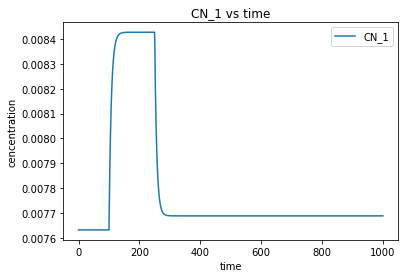

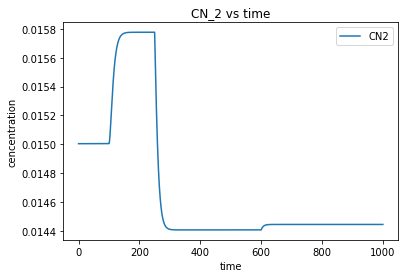

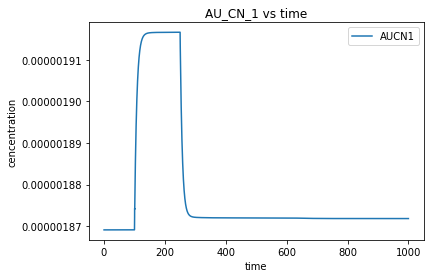

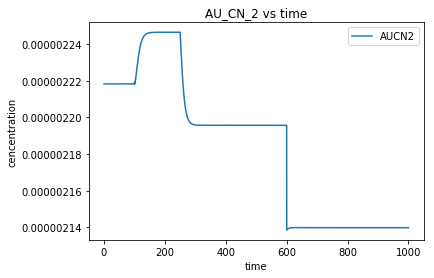

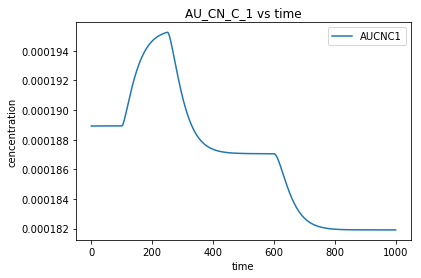

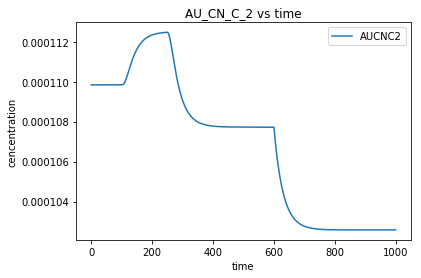

In [41]:
plt.figure(0)
plt.title('CN_1 vs time')
plt.xlabel('time')
plt.ylabel('cencentration')
plt.plot(tspan, s[:,0], label='CN_1')
plt.legend()


plt.figure(1)
plt.title('CN_2 vs time')
plt.xlabel('time')
plt.ylabel('cencentration')
plt.plot(tspan, s[:,1], label='CN2')
plt.legend()

plt.figure(2)
plt.title('AU_CN_1 vs time')
plt.xlabel('time')
plt.ylabel('cencentration')
plt.plot(tspan, s[:,2], label='AUCN1')
plt.legend()

plt.figure(3)
plt.title('AU_CN_2 vs time')
plt.xlabel('time')
plt.ylabel('cencentration')
plt.plot(tspan, s[:,3], label='AUCN2')
plt.legend()

plt.figure(4)
plt.title('AU_CN_C_1 vs time')
plt.xlabel('time')
plt.ylabel('cencentration')
plt.plot(tspan, s[:,4], label='AUCNC1')
plt.legend()

plt.figure(5)
plt.title('AU_CN_C_2 vs time')
plt.xlabel('time')
plt.ylabel('cencentration')
plt.plot(tspan, s[:,5], label='AUCNC2')
plt.legend()
plt.show()

## Question 3: Simulation with dead time

Consider now a situation where a long pipe is used to transport liquid material between the two tanks. The flow in the pipe conforms to a plug flow model and no reaction occurs in the pipe, so that effectively a delay is introduced in the concentration AU_CN_1, and CN_1 entering the 2nd tank. The deadtime incurred is 100 s. 

Using the same set of input steps, show the effect of the deadtime by plotting the following curves:

- 1) CN_1 and CN_1 delayed on the same graph
- 2) Au_CN_2 with deadtime and AU_CN_2 without deadtime (previous question) on the same graph

comment on the effect deadtime has on this system. Note that since you are using euler integration here step size is very important. If step size is too large you might find yourself calculating a negative value for a state which will break your simulation.

## Solution

In [42]:
tspan_1 = numpy.linspace(0, 1000, 100000)

def euler(x0, ts):
#     n = 0
    F_D1_temp = 2.86e-4 # m3/s
    F_s0_temp = 0.328 # m3/s
    p_O22_temp = 0.21
    
    AuCN2_star = 2.6e-5 # kmol/m3
    CN_D = 9.5 #kmol/m3
    V1,V2 = [2.5]*2  # m3
    rho_c1,rho_c2 = [16]*2 # kg/m3
    K_H = 1300 #kmol/m3atm
    K_l = 1.215 #m3/kmols
    K_a = 45  # m3/kmols
    alpha = 4500 # unitless
    beta = 0.9  # unitless
    AU_CN_carb_3 = 0 
    CN_0 = 0
    AU_CN_0 = 0
    
    F_D2 = 2.86e-4 # m3/s
    m_c = 1.33 # kg/s
    p_O21 = 0.21 # atm
    
    dt = (ts[-1]-ts[0])/len(ts)
    
    CN_1, CN_2, AU_CN_1, AU_CN_2, AU_CN_C_1, AU_CN_C_2 = x0
    
    CN1 = [CN_1]
    CN2 = [CN_2]
    AUCN1 = [AU_CN_1]
    AUCN2 = [AU_CN_2]
    AUCNC1 = [AU_CN_C_1]
    AUCNC2 = [AU_CN_C_2]
#     print(dt)
    for i in range(len(ts)):
        t = ts[i]
        
        if t >= 600:
            p_O22 = 0.9 * p_O22_temp 
        else:
            p_O22 = 0.21
            
        if t >= 250:  
            F_s0 = 1.1 * F_s0_temp
        else:
            F_s0 = 0.328
            
        if t >= 100:
            F_D1 = 1.1 * F_D1_temp 
        else:
            F_D1 = 2.86e-4
        
#         print(p_O22)
        
        if i > 0:
            O2_1 = K_H*p_O21  
            O2_2 = K_H*p_O22  

            rl_1 = K_l * (CN_1)**0.5 * O2_1**0.5 * (AuCN2_star - AU_CN_1)  
            rl_2 = K_l * (CN_2)**0.5 * O2_2**0.5 * (AuCN2_star - AU_CN_2)  

            ra_1 = K_a * AU_CN_1 * (alpha * AU_CN_1 ** beta - AU_CN_C_1)   
            ra_2 = K_a * AU_CN_2 * (alpha * AU_CN_2 ** beta - AU_CN_C_2)  

            F_s1 = F_s0 + F_D1  
            F_s2 = F_s1 + F_D2
            
            t_CN_1 = CN1[i-1] + ((F_D1 / V1) * CN_D + (F_s0/V1) * CN_0 - (F_s1/V1) * CN_1 - 2* rl_1)*dt
            t_CN_2 = CN2[i-1] +((F_D2 / V2) * CN_D + (F_s1/V2) * CN_1 - (F_s2/V2) * CN_2 - 2* rl_2)*dt
            t_AU_CN_1 = AUCN1[i-1] + ((F_s0 / V1) * AU_CN_0 - (F_s1 / V1) * AU_CN_1 + rl_1 - ra_1 * rho_c1)*dt
            t_AU_CN_2 = AUCN2[i-1] + ((F_s1 / V2) * AU_CN_1 - (F_s2 / V2) * AU_CN_2 + rl_2 - ra_2 * rho_c2)*dt
            t_AU_CN_C_1 = AUCNC1[i-1] + ((m_c/(rho_c1 * V1)) * ( AU_CN_C_2 - AU_CN_C_1) + ra_1)*dt
            t_AU_CN_C_2 = AUCNC2[i-1] + ((m_c/(rho_c2 * V2)) * ( AU_CN_carb_3 - AU_CN_C_2) + ra_2)*dt
        
            CN1.append(t_CN_1)
            CN2.append(t_CN_2)
            AUCN1.append(t_AU_CN_1)
            AUCN2.append(t_AU_CN_2)
            AUCNC1.append(t_AU_CN_C_1)
            AUCNC2.append(t_AU_CN_C_2)

            CN_1 = t_CN_1
            CN_2 = t_CN_2
            AU_CN_1 = t_AU_CN_1
            AU_CN_2 = t_AU_CN_2
            AU_CN_C_1 = t_AU_CN_C_1
            AU_CN_C_2 = t_AU_CN_C_2
            
    return CN1, CN2, AUCN1, AUCN2, AUCNC1, AUCNC2
    
l = euler(x0state, tspan_1)


In [43]:
def dead_euler(x0, ts):
    F_D1_temp = 2.86e-4 # m3/s
    F_s0_temp = 0.328 # m3/s
    p_O22_temp = 0.21
    
    AuCN2_star = 2.6e-5 # kmol/m3
    CN_D = 9.5 #kmol/m3
    V1,V2 = [2.5]*2  # m3
    rho_c1,rho_c2 = [16]*2 # kg/m3
    K_H = 1300 #kmol/m3atm
    K_l = 1.215 #m3/kmols
    K_a = 45  # m3/kmols
    alpha = 4500 # unitless
    beta = 0.9  # unitless
    AU_CN_carb_3 = 0 
    CN_0 = 0
    AU_CN_0 = 0
    
    F_D2 = 2.86e-4 # m3/s
    m_c = 1.33 # kg/s
    p_O21 = 0.21 # atm
    
    dt = (ts[-1]-ts[0])/len(ts)
    
    CN1, CN2, AUCN1, AUCN2, AUCNC1, AUCNC2 = euler(x0, ts)
    
    CN_1, CN_2, AU_CN_1, AU_CN_2, AU_CN_C_1, AU_CN_C_2 = x0
    
    t_temp = []
    
    D_CN1 = [CN_1]
    D_CN2 = [CN_2]
    D_AUCN1 = [AU_CN_1]
    D_AUCN2 = [AU_CN_2]
    D_AUCNC1 = [AU_CN_C_1]
    D_AUCNC2 = [AU_CN_C_2]
    
    for g in range(len(ts)):
        t = ts[g]
        if g == 0:
            t_temp.append(t)
        
        if t >= 600+100:
            p_O22 = 0.9 * p_O22_temp 
        else:
            p_O22 = 0.21
            
        if t >= 250+100:  
            F_s0 = 1.1 * F_s0_temp
        else:
            F_s0 = 0.328
            
        if t >= 100+100:
            F_D1 = 1.1 * F_D1_temp 
        else:
            F_D1 = 2.86e-4
        
        
        if t < 100:
            dCN_1 = CN_1
            dCN_2 = CN_2
            dAU_CN_1 = AU_CN_1
            dAU_CN_2 = AU_CN_2
            dAU_CN_C_1 = AU_CN_C_1
            dAU_CN_C_2 = AU_CN_C_2
        else:
            CN_1 = CN1[int((t-100)/dt)]
            CN_2 = CN2[int((t-100)/dt)]
            AU_CN_1 = AUCN1[int((t-100)/dt)]
            AU_CN_2 = AUCN2[int((t-100)/dt)]
            AU_CN_C_1 = AUCNC1[int((t-100)/dt)]
            AU_CN_C_2 = AUCNC2[int((t-100)/dt)]
        
        if t > 100:
            dC1 = D_CN1[g-1]
            dC2 = D_CN2[g-1]
            dAC1 = D_AUCN1[g-1]
            dAC2 = D_AUCN2[g-1]
            dACC1 = D_AUCNC1[g-1]
            dACC2 = D_AUCNC2[g-1]

            O2_1 = K_H*p_O21  
            O2_2 = K_H*p_O22  

            rl_1 = K_l * (CN_1)**0.5 * O2_1**0.5 * (AuCN2_star - AU_CN_1)  
            rl_2 = K_l * (CN_2)**0.5 * O2_2**0.5 * (AuCN2_star - AU_CN_2)  

            ra_1 = K_a * AU_CN_1 * (alpha * AU_CN_1 ** beta - AU_CN_C_1)   
            ra_2 = K_a * AU_CN_2 * (alpha * AU_CN_2 ** beta - AU_CN_C_2)  

            F_s1 = F_s0 + F_D1  
            F_s2 = F_s1 + F_D2
            
            d_CN_1 = D_CN1[g-1] + ((F_D1 / V1) * CN_D + (F_s0/V1) * CN_0 - (F_s1/V1) * CN_1 - 2* rl_1)*dt
            d_CN_2 = D_CN2[g-1] + ((F_D2 / V2) * CN_D + (F_s1/V2) * CN_1 - (F_s2/V2) * CN_2 - 2* rl_2)*dt
            
            d_AU_CN_1 = D_AUCN1[g-1] + ((F_s0 / V1) * AU_CN_0 - (F_s1 / V1) * AU_CN_1 + rl_1 - ra_1 * rho_c1)*dt
            d_AU_CN_2 = D_AUCN2[g-1] + ((F_s1 / V2) * AU_CN_1 - (F_s2 / V2) * AU_CN_2 + rl_2 - ra_2 * rho_c2)*dt
            
            d_AU_CN_C_1 = D_AUCNC1[g-1] + ((m_c/(rho_c1 * V1)) * ( AU_CN_C_2 - AU_CN_C_1) + ra_1)*dt
            d_AU_CN_C_2 = D_AUCNC2[g-1] + ((m_c/(rho_c2 * V2)) * ( AU_CN_carb_3 - AU_CN_C_2) + ra_2)*dt
            
            D_CN1.append(d_CN_1)
            D_CN2.append(d_CN_2)
            D_AUCN1.append(d_AU_CN_1)
            D_AUCN2.append(d_AU_CN_2)
            D_AUCNC1.append(d_AU_CN_C_1)
            D_AUCNC2.append(d_AU_CN_C_2)
            t_temp.append(t)

            dCN_1 = d_CN_1
            dCN_2 = d_CN_2
            dAU_CN_1 = d_AU_CN_1
            dAU_CN_2 = d_AU_CN_2
            dAU_CN_C_1 = d_AU_CN_C_1
            dAU_CN_C_2 = d_AU_CN_C_2
            
        elif t != 0:
            D_CN1.append(dCN_1)
            D_CN2.append(dCN_2)
            D_AUCN1.append(dAU_CN_1)
            D_AUCN2.append(dAU_CN_2)
            D_AUCNC1.append(dAU_CN_C_1)
            D_AUCNC2.append(dAU_CN_C_2)
            t_temp.append(t)
            
    return D_CN1, D_CN2, D_AUCN1, D_AUCN2, D_AUCNC1, D_AUCNC2, t_temp

p = dead_euler(x0state, tspan_1)

## Plots

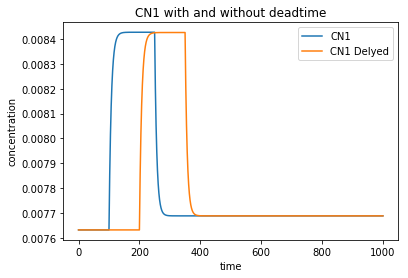

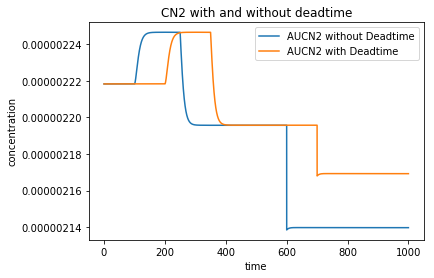

In [44]:
plt.figure()
plt.title("CN1 with and without deadtime")
plt.xlabel("time")
plt.ylabel("concentration")
plt.plot(tspan, s[:,0], label='CN1')
plt.plot(tspan_1, p[0], label='CN1 Delyed')
plt.legend()
plt.show()
plt.figure()
plt.title("CN2 with and without deadtime")
plt.xlabel("time")
plt.ylabel("concentration")
plt.plot(tspan_1, l[3], label = 'AUCN2 without Deadtime')
plt.plot(tspan_1, p[3], label='AUCN2 with Deadtime')
plt.legend()
plt.show()

## Question 4 : Valve simulation

Modify your simulation (Deadtime free) to include the effect of an equal percentage pneumatic control valve on the inlet F_D1.
The Pressure signal to the valve can vary from 20 to 100 kpa. The valve dynamics are well described in the handout. Size your valve so that it is open halfway (x = 0.5) at initial conditions where the pressure signal to the valve is 60 kPa, and so that if your valve is closed to 25% (x = 0.25), the flow, F_D1, will decrease by 25%. You may assume a constant pressure drop of 1 atm over the valve.

Consider the following step changes:

- an increase in valve pressure signal (Ps) from 60 kpa to 70 kpa at t = 200s. 
- a decrease in valve pressure signal from 70 kpa to 50 kPa at t = 500s.

plot the following dynamic trends:

- Ps(t) (valve pressure signal) and valve fraction (x(t)) as 2 subplots (one under the other)
- $Au[CN_2]^-_{carbon,2}(t)\ \ $  on a separate plot. (The concentration of aurocyanide adsorbed to carbon in the 2nd tank) 

In case there's any confustion: Au_CN_carb_2 refers to $ [Au(CN_2)^-_{carbon}] $  in tank 2



## Valve Properties

In [45]:
tau = 5 # s
zeta = 0.2          
del_P = 1  # atm  (pressure drop over valve)

ΔP = del_P

## Solution

$$\tau^2 \frac{d^2x}{dt^2} + 2 \zeta \tau \frac{dx}{dt} + x = K f(Ps - 20)$$

\begin{eqnarray}
  \dfrac{d}{dt}\left[ \begin{array}{c}x \\ z \end{array} \right ] &=&
  \left [
    \begin{array}{c}
      z \\
      \tau^{-2} \left ( K_F(P_S-20) - 2\tau \zeta z - x\right )
    \end{array} \right ]  \\
  \dfrac{d\mathbf{y}}{dt} &=&  \left [
    \begin{array}{c}
      y_2 \\
      \tau^{-2} \left ( K_F(P_S-20) - 2\tau \zeta y_2  - y_1\right )
    \end{array} \right ]
\end{eqnarray}

In [46]:
tspan_2 = numpy.linspace(0, 1000, 1000000)

def func_2(s0):
    C_v, γ = s0
    return [C_v*γ**(1-0.5)*del_P**0.5 - F_D1,
            C_v*γ**(1-0.25)*del_P**0.5 - 0.75*F_D1]

e0 = [1,1]

q = fsolve(func_2, e0)

C_v, γ = q

In [47]:
def valve_FD_1(C_v, γ, x_list, ΔP, ts):
    F = []
    for i in range(len(ts)):
        x = x_list[i]
        F_D1 = C_v*γ**(1-x)*ΔP**0.5
        F.append(F_D1)
    return F

In [48]:
Kf = (1-0)/(100-20)
x0 = [0.5, 0]

τ = tau
ζ = zeta

Psi = []


for i in range(len(tspan_2)):
    t = tspan_2[i]
    if t < 200:
        Psi.append(60)
    elif (t >= 200) and (t < 500):
        Psi.append(70)
    elif (t >= 500):
        Psi.append(50)
        
# print(Psi)    

def valve_euler(x, Ps, ts):
    x_ans = [0.5]
    dx = [0]
    dt = (ts[-1]-ts[0])/len(ts)
    
    for i in range(1, len(ts-1)):
        
        Ps = Psi[i]
        if i == 1:
            s = x[1]
            ds = tau**-2*(Kf*(Ps - 20) - 2*tau*zeta*x[1] - x[0])
        if i != 1:
            s = dx[i-1]
            ds = tau**-2*(Kf*(Ps - 20) - 2*tau*zeta*dx[i-1] - x_ans[i-1])
        x_ans.append(x_ans[i-1] + s*dt)
        dx.append(dx[i-1] + ds*dt)
        
    return x_ans

a = valve_euler(x0, Psi, tspan_2)

F_list = valve_FD_1(C_v, γ, a, ΔP, tspan_2)

In [49]:
def euler_4(x0, ts, FD1):
    F_D1_temp = 2.86e-4 # m3/s
    F_s0_temp = 0.328 # m3/s
    p_O22_temp = 0.21
    
    AuCN2_star = 2.6e-5 # kmol/m3
    CN_D = 9.5 #kmol/m3
    V1,V2 = [2.5]*2  # m3
    rho_c1,rho_c2 = [16]*2 # kg/m3
    K_H = 1300 #kmol/m3atm
    K_l = 1.215 #m3/kmols
    K_a = 45  # m3/kmols
    alpha = 4500 # unitless
    beta = 0.9  # unitless
    AU_CN_carb_3 = 0 
    CN_0 = 0
    AU_CN_0 = 0
    
    F_D2 = 2.86e-4 # m3/s
    m_c = 1.33 # kg/s
    p_O21 = 0.21 # atm
    
    dt = (ts[-1]-ts[0])/len(ts)
    
    CN_1, CN_2, AU_CN_1, AU_CN_2, AU_CN_C_1, AU_CN_C_2 = x0
    
    CN1 = [CN_1]
    CN2 = [CN_2]
    AUCN1 = [AU_CN_1]
    AUCN2 = [AU_CN_2]
    AUCNC1 = [AU_CN_C_1]
    AUCNC2 = [AU_CN_C_2]
#     print(dt)
    for d in range(len(ts)):
        t = ts[d]
        
        F_D1 = FD1[d]
        
        if d > 0:
            O2_1 = K_H*p_O21  
            O2_2 = K_H*p_O22  

            rl_1 = K_l * (CN_1)**0.5 * O2_1**0.5 * (AuCN2_star - AU_CN_1)  
            rl_2 = K_l * (CN_2)**0.5 * O2_2**0.5 * (AuCN2_star - AU_CN_2)  

            ra_1 = K_a * AU_CN_1 * (alpha * AU_CN_1 ** beta - AU_CN_C_1)   
            ra_2 = K_a * AU_CN_2 * (alpha * AU_CN_2 ** beta - AU_CN_C_2)  

            F_s1 = F_s0 + F_D1  
            F_s2 = F_s1 + F_D2
            
            t_CN_1 = CN1[d-1] + ((F_D1 / V1) * CN_D + (F_s0/V1) * CN_0 - (F_s1/V1) * CN_1 - 2* rl_1)*dt
            t_CN_2 = CN2[d-1] +((F_D2 / V2) * CN_D + (F_s1/V2) * CN_1 - (F_s2/V2) * CN_2 - 2* rl_2)*dt
            t_AU_CN_1 = AUCN1[d-1] + ((F_s0 / V1) * AU_CN_0 - (F_s1 / V1) * AU_CN_1 + rl_1 - ra_1 * rho_c1)*dt
            t_AU_CN_2 = AUCN2[d-1] + ((F_s1 / V2) * AU_CN_1 - (F_s2 / V2) * AU_CN_2 + rl_2 - ra_2 * rho_c2)*dt
            t_AU_CN_C_1 = AUCNC1[d-1] + ((m_c/(rho_c1 * V1)) * ( AU_CN_C_2 - AU_CN_C_1) + ra_1)*dt
            t_AU_CN_C_2 = AUCNC2[d-1] + ((m_c/(rho_c2 * V2)) * ( AU_CN_carb_3 - AU_CN_C_2) + ra_2)*dt
        
        
            CN1.append(t_CN_1)
            CN2.append(t_CN_2)
            AUCN1.append(t_AU_CN_1)
            AUCN2.append(t_AU_CN_2)
            AUCNC1.append(t_AU_CN_C_1)
            AUCNC2.append(t_AU_CN_C_2)

            CN_1 = t_CN_1
            CN_2 = t_CN_2
            AU_CN_1 = t_AU_CN_1
            AU_CN_2 = t_AU_CN_2
            AU_CN_C_1 = t_AU_CN_C_1
            AU_CN_C_2 = t_AU_CN_C_2

    return CN1, CN2, AUCN1, AUCN2, AUCNC1, AUCNC2



j = euler_4(x0state, tspan_2, F_list)

## Plots

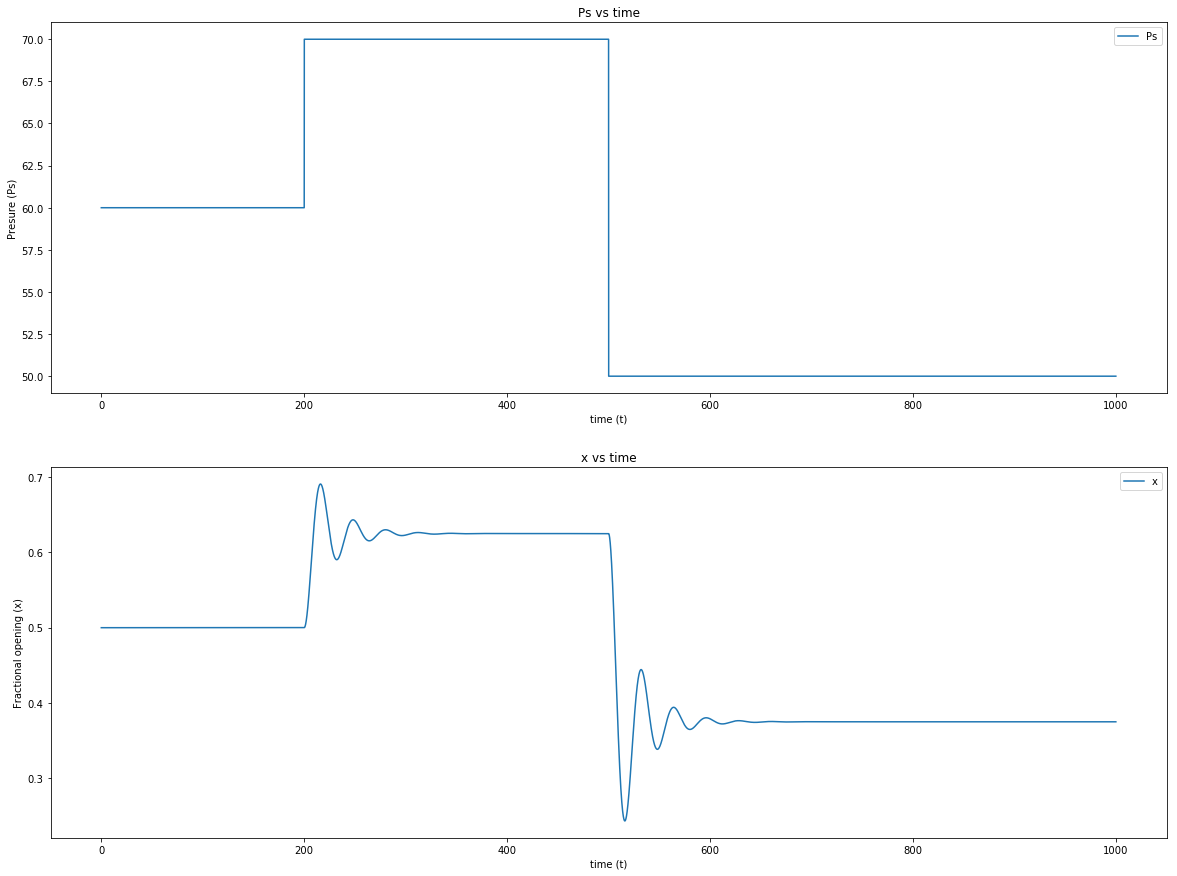

In [50]:
plt.figure("Ps & x", figsize=(20,15))
plt.subplot(211)
plt.title("Ps vs time")
plt.xlabel("time (t)")
plt.ylabel("Presure (Ps)")
plt.plot(tspan_2, Psi, label='Ps')
plt.legend()
plt.subplot(212)
plt.title("x vs time")
plt.xlabel("time (t)")
plt.ylabel("Fractional opening (x)")
plt.plot(tspan_2, a, label='x')
plt.legend()
plt.show()

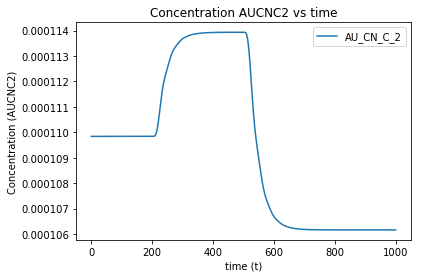

In [51]:
plt.figure()
plt.title("Concentration AUCNC2 vs time")
plt.xlabel("time (t)")
plt.ylabel("Concentration (AUCNC2)")
plt.plot(tspan_2, j[5], label="AU_CN_C_2")
plt.legend()
plt.show()

## Bonus question (For 5 marks)

Comment on the performance of the control valve with respect to it's dynamic behaviour. What effect could this behaviour have on the performance and longevity of the plant equipment in terms of stability, safety etc. and how might this affect the performance of the control system used to reject disturbances and maintain set points. 

From the dynamic models it can be seen that small changes to the system can affect the outlet concentrations quite a bit. Having a control valve can help counteract such changes as it can be linked to a control system and through feedback and feed forward controllers, the valve openings can be changed to account for system disturbances resulting in higher final AU_CN_C concentrations which would make the system more efficient.